Loading Iris dataset...

Standardizing features...
Scaled data shape: (150, 4)
Mean of scaled data (should be ~0): [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
Std of scaled data (should be ~1): [1. 1. 1. 1.]

CHOOSING OPTIMAL K USING SILHOUETTE METHOD
k=2: Silhouette Score = 0.5818
k=3: Silhouette Score = 0.4599
k=4: Silhouette Score = 0.3869
k=5: Silhouette Score = 0.3459
k=6: Silhouette Score = 0.3171
k=7: Silhouette Score = 0.3202
k=8: Silhouette Score = 0.3387
k=9: Silhouette Score = 0.3424
k=10: Silhouette Score = 0.3518

 Optimal k chosen: 2 (Silhouette Score: 0.5818)

Fitting final K-Means with k=2...
Final K-Means training complete!

CLUSTER INSPECTION

Cluster Labels (first 20): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Unique clusters: [0 1]

Cluster Centers (standardized feature space):
  Cluster 0: [ 0.50728948 -0.42663134  0.65249366  0.62744675]
  Cluster 1: [-1.01457897  0.85326268 -1.30498732 -1.25489349]

Cluster Sizes:
  Cluster 0: 100 samples
  

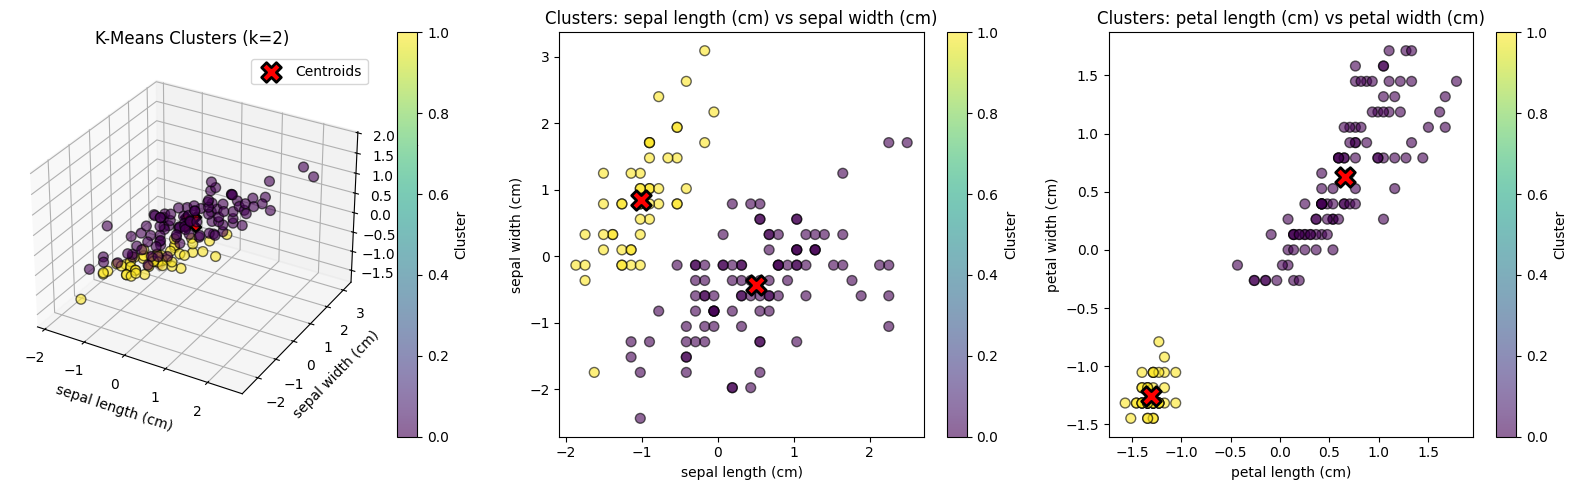


CLUSTER ANALYSIS SUMMARY

Optimal number of clusters: 2
Total samples: 150

Cluster Distribution:
  Cluster 0: 100 samples (66.7%)
  Cluster 1: 50 samples (33.3%)

Silhouette Scores for k=2 to k=10:
  k=2: 0.5818 ← OPTIMAL
  k=3: 0.4599
  k=4: 0.3869
  k=5: 0.3459
  k=6: 0.3171
  k=7: 0.3202
  k=8: 0.3387
  k=9: 0.3424
  k=10: 0.3518


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples


print("Loading Iris dataset...")
iris = load_iris()
X = iris.data
feature_names = iris.feature_names
species_names = iris.target_names
true_labels = iris.target

# 3. Preprocess - standardize features
print("\nStandardizing features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(f"Scaled data shape: {X_scaled.shape}")
print(f"Mean of scaled data (should be ~0): {X_scaled.mean(axis=0)}")
print(f"Std of scaled data (should be ~1): {X_scaled.std(axis=0)}")

# 4. Choose k using silhouette method
print("\n" + "="*50)
print("CHOOSING OPTIMAL K USING SILHOUETTE METHOD")
print("="*50)

k_range = range(2, 11)
silhouette_scores = []
kmeans_models = {}

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    sil_score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(sil_score)
    kmeans_models[k] = kmeans
    print(f"k={k}: Silhouette Score = {sil_score:.4f}")

optimal_k = list(k_range)[np.argmax(silhouette_scores)]
print(f"\n Optimal k chosen: {optimal_k} (Silhouette Score: {max(silhouette_scores):.4f})")

# 5. Fit final K-Means with chosen k
print(f"\nFitting final K-Means with k={optimal_k}...")
final_kmeans = kmeans_models[optimal_k]
cluster_labels = final_kmeans.fit_predict(X_scaled)
cluster_centers = final_kmeans.cluster_centers_
print("Final K-Means training complete!")

# 6. Inspect clusters
print("\n" + "="*50)
print("CLUSTER INSPECTION")
print("="*50)

print(f"\nCluster Labels (first 20): {cluster_labels[:20]}")
print(f"Unique clusters: {np.unique(cluster_labels)}")

print("\nCluster Centers (standardized feature space):")
for i, center in enumerate(cluster_centers):
    print(f"  Cluster {i}: {center}")

print("\nCluster Sizes:")
unique, counts = np.unique(cluster_labels, return_counts=True)
cluster_sizes = dict(zip(unique, counts))
for cluster_id, size in cluster_sizes.items():
    print(f"  Cluster {cluster_id}: {size} samples")

# Compare with true species labels
print("\nMapping of Clusters to True Species:")
print("(Rows=Predicted Clusters, Cols=True Species)")
cluster_species_mapping = pd.crosstab(
    cluster_labels,
    true_labels,
    rownames=['Cluster'],
    colnames=['Species']
)
cluster_species_mapping.columns = species_names
print(cluster_species_mapping)

# Calculate cluster purity (optional but informative)
print("\nCluster Composition by Species:")
for cluster_id in range(optimal_k):
    mask = cluster_labels == cluster_id
    cluster_species = true_labels[mask]
    species_dist = np.bincount(cluster_species, minlength=len(species_names))
    print(f"\n  Cluster {cluster_id}:")
    for sp_idx, count in enumerate(species_dist):
        print(f"    {species_names[sp_idx]}: {count}")

# 7. Visualize clusters (using 3D plot with first 3 features)
print("\nGenerating cluster visualizations...")

fig = plt.figure(figsize=(16, 5))

# 3D scatter plot of clusters
ax1 = fig.add_subplot(131, projection='3d')
scatter = ax1.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2],
                      c=cluster_labels, cmap='viridis', s=50, alpha=0.6, edgecolors='k')
ax1.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2],
            c='red', marker='X', s=200, edgecolors='black', linewidths=2, label='Centroids')
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.set_zlabel(feature_names[2])
ax1.set_title(f'K-Means Clusters (k={optimal_k})')
ax1.legend()
plt.colorbar(scatter, ax=ax1, label='Cluster')

# 2D projection: Feature 0 vs Feature 1
ax2 = fig.add_subplot(132)
scatter2 = ax2.scatter(X_scaled[:, 0], X_scaled[:, 1],
                       c=cluster_labels, cmap='viridis', s=50, alpha=0.6, edgecolors='k')
ax2.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
            c='red', marker='X', s=200, edgecolors='black', linewidths=2, label='Centroids')
ax2.set_xlabel(feature_names[0])
ax2.set_ylabel(feature_names[1])
ax2.set_title(f'Clusters: {feature_names[0]} vs {feature_names[1]}')
plt.colorbar(scatter2, ax=ax2, label='Cluster')

# 2D projection: Feature 2 vs Feature 3
ax3 = fig.add_subplot(133)
scatter3 = ax3.scatter(X_scaled[:, 2], X_scaled[:, 3],
                       c=cluster_labels, cmap='viridis', s=50, alpha=0.6, edgecolors='k')
ax3.scatter(cluster_centers[:, 2], cluster_centers[:, 3],
            c='red', marker='X', s=200, edgecolors='black', linewidths=2, label='Centroids')
ax3.set_xlabel(feature_names[2])
ax3.set_ylabel(feature_names[3])
ax3.set_title(f'Clusters: {feature_names[2]} vs {feature_names[3]}')
plt.colorbar(scatter3, ax=ax3, label='Cluster')

plt.tight_layout()
plt.show()

# 8. Analyze cluster sizes and mapping to true species
print("\n" + "="*50)
print("CLUSTER ANALYSIS SUMMARY")
print("="*50)

print(f"\nOptimal number of clusters: {optimal_k}")
print(f"Total samples: {len(cluster_labels)}")

print("\nCluster Distribution:")
for cluster_id in range(optimal_k):
    size = cluster_sizes[cluster_id]
    percentage = (size / len(cluster_labels)) * 100
    print(f"  Cluster {cluster_id}: {size} samples ({percentage:.1f}%)")

print("\nSilhouette Scores for k=2 to k=10:")
for k, score in zip(k_range, silhouette_scores):
    marker = " ← OPTIMAL" if k == optimal_k else ""
    print(f"  k={k}: {score:.4f}{marker}")